In [ ]:
#/content/drive/MyDrive/titanic/test.csv
file_path = '/content/drive/MyDrive/titanic/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv(file_path+'train.csv')
test = pd.read_csv(file_path+'test.csv')
submission = pd.read_csv(file_path+'submission.csv')
train.shape, test.shape, submission.shape

((891, 12), (418, 11), (418, 2))

In [ ]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#1.정렬을 한후 두 리스는 출력해서 비교해 본다.
#2 set으로 만드어서 차 집합을 구한다.
train_set = set(train)
test_set = set(test)
train_set - test_set

{'Survived'}

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# test['Survived'] = submission['Survived']
test_merged = pd.merge(test,submission,on = 'PassengerId')
test_merged.shape
test_merged.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
# 데이터 구조 파악
# 결측값 확인
# EDA 데이터 탐색
# 상관관계 표.. heatmap
# 타겟에대한 상관관계를 보고 적절한 피처를 선택
# 데이터결합... concat  axix = 0  위에서 아래로
# 전처리
# 모델선택  최소 2개이상...(베이스 라인 모델)
# 예측...

In [ ]:
train.info() # 데이터 구조 파악


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 기술통계량 describe 함수를 사용
# include 옵션에 all을 사용하면 숫자형이 아닌 문자열 등에 대한 정보를 포함
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


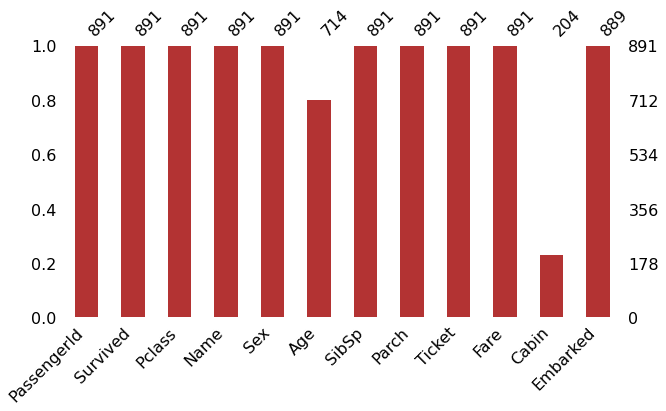

In [ ]:
# 결측값확인
# !pip install missingno
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

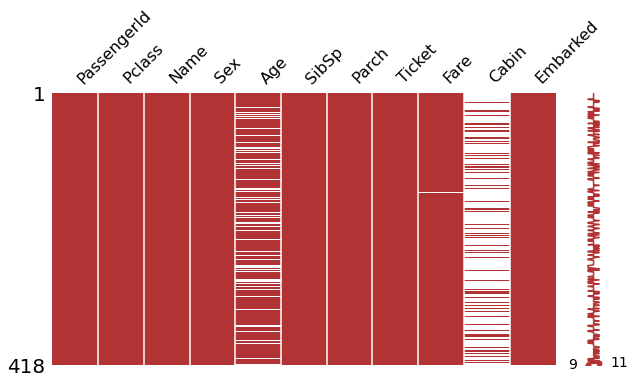

In [ ]:
# matrix 함수를 사용하면 어느위치에서 결측값이 있는지 확인
msno.matrix(test,figsize=(10,5),color = (0.7,0.2,0.2))
plt.show()

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

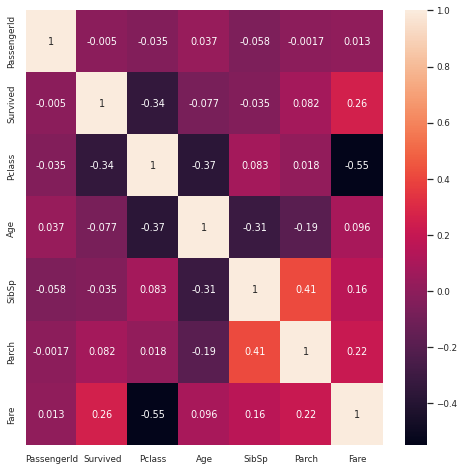

In [ ]:
# 상관관계 분석
# heat map을 그린다.
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [ ]:
# concat 함스로 데이터프레임을 위 아래 방향으로 연결(axis = 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train["TrainSplit"] = 'Train'
test_merged["TrainSplit"] = 'Test'
test_merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,TrainSplit
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Test


In [ ]:
data = pd.concat([train,test_merged],axis = 0)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test


In [ ]:
print(data.shape)
print(data.isnull().sum())

(1309, 13)
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
TrainSplit        0
dtype: int64


In [ ]:
# 전처리
# 결측치 : 제거, 0, 평균, 최빈값(빈도수가 가장 많은 값)
# 나이는 평균으로 대처
data[data['Fare'].isnull()]
# 최빈값과 3등실의 평균값을 살펴보자.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Test


In [ ]:
# 학습을 위해서 숫자형 컬럼만 추출
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  TrainSplit   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


In [ ]:
# 숫자형데이터만 추출
data_num = data.loc[:, ['Survived','Pclass','Age','SibSp','Parch','Fare']]
data_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
data_num['Age'] =  data_num['Age'].fillna( data_num['Age'].mean())

In [ ]:
# 최빈값
print(f"Fare의 최빈값 : {data_num['Fare'].mode()[0]}")


Fare의 최빈값 : 8.05


In [ ]:
# 3등급의 평균 Fare
data_num[data_num['Pclass'] == 3]['Fare'].mean()

13.302888700564969

In [ ]:
data_num['Fare'] =  data_num['Fare'].fillna( data_num['Fare'].mode()[0])

In [ ]:
data_num.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# 모델을 학습하고 검증  8:2 로분할
# 숫자형 데이터 프레임 , 원본 data 프레임의 인덱스 구조는 동일
X_train = data_num[data['TrainSplit'] == 'Train'].iloc[:,1:]
Y_train = data_num[data['TrainSplit'] == 'Train']['Survived']
X_train.shape, Y_train.shape

((891, 5), (891,))

In [ ]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_test = data_num[data['TrainSplit'] == 'Test'].iloc[:,1:]
Y_test = data_num[data['TrainSplit'] == 'Test']['Survived']
X_test.shape, Y_test.shape

((418, 5), (418,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(X_train, Y_train,test_size = 0.2, random_state = 42)

In [ ]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)
lr.fit(x_train,y_train)
y_val_pred = lr.predict(x_val)

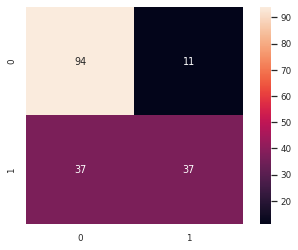

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_val_pred), annot=True, square=True)
plt.show()

In [96]:
# 정밀도(Precision) : True로 예측했는데 실제 True 인 비율  TP/TP+FP
# 재현율(Recall) : 실제 True중에서 True로 예측한 모형이 적중한 비율  TP / TP + FN
# F1-score : 정확도 재현율의 평균.... 즉.. 모형의 예측력을 평가하는 지표  2*(Precision * Recall) / Precision + Recall

In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
print(f"accuracy_score : {accuracy_score(y_val, y_val_pred)}")
print(f"precision_score : {precision_score(y_val, y_val_pred)}")
print(f"recall_score : {recall_score(y_val, y_val_pred)}")
print(f"f1_score : {f1_score(y_val, y_val_pred)}")
print(f"roc_auc_score : {roc_auc_score(y_val, y_val_pred)}")

accuracy_score : 0.7318435754189944
precision_score : 0.7708333333333334
recall_score : 0.5
f1_score : 0.6065573770491803
roc_auc_score : 0.6976190476190477


In [100]:
# roc_auc_score : 데이콘에서 사용하는 평가 지표... 1이 될수록 예측력이 좋은 모델임

In [102]:
y_test_pred = lr.predict(X_test)

In [103]:
# 제출 양식
submission['Survived'] = y_test_pred.astype(int)

In [106]:
# 제출 파일 저장
submission_filepath = '/content/drive/MyDrive/titanic/baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [111]:
# 피처엔지니어링 **
# 각 피처를 하나씩 모델 학습에 맞도록 전처리를 하고 모델 성능을 개선할 수 있는 방법을 찾는다
# 목표 레이블 분포를 확인
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

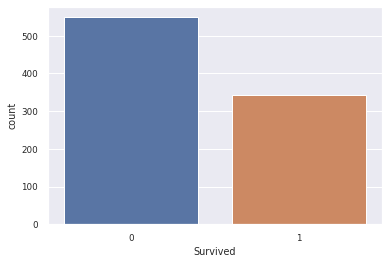

In [112]:
# 생존자와 사망자의 분포
sns.countplot(x='Survived', data = data[data['TrainSplit'] == 'Train'])
plt.show()

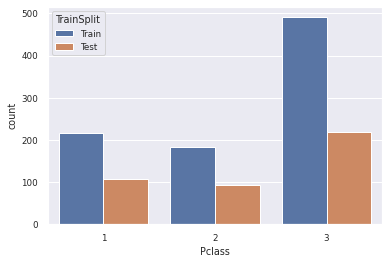

In [113]:
# 객실 등급별
sns.countplot(x='Pclass',data=data, hue='TrainSplit')
plt.show()

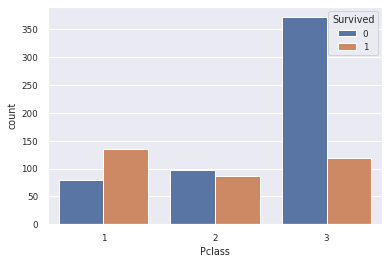

In [116]:
# 객실 등급에 따른 생존자 비율
sns.countplot(x='Pclass',data= data[data['TrainSplit'] == 'Train'], hue='Survived')
plt.show()

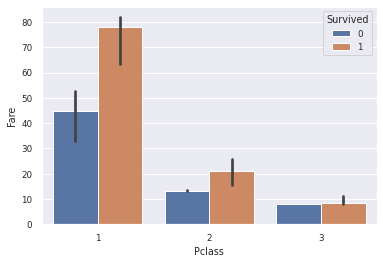

In [117]:
# 피처 엔지니어링
# pclass별 fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass', y='Fare', hue = 'Survived', data=data[data['TrainSplit'] == 'Train'], estimator=np.median)
plt.show()

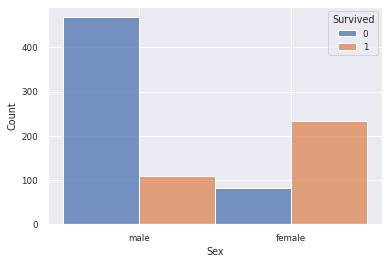

In [122]:
sns.histplot(x='Sex', hue = 'Survived', data=data[data['TrainSplit'] == 'Train'], multiple = 'dodge')
plt.show()

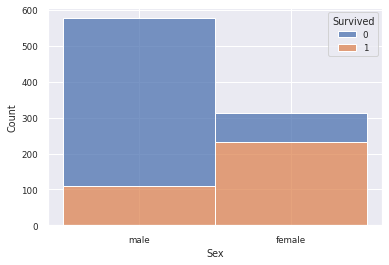

In [123]:
sns.histplot(x='Sex', hue = 'Survived', data=data[data['TrainSplit'] == 'Train'], multiple = 'stack')
plt.show()

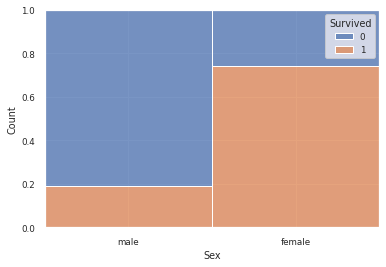

In [125]:
sns.histplot(x='Sex', hue = 'Survived', data=data[data['TrainSplit'] == 'Train'], multiple = 'fill')
plt.show()

In [129]:
# female  0   / male   1
data.loc[data['Sex'] == 'female','Sex'] = 0
data.loc[data['Sex'] == 'male','Sex'] = 1
data['Sex'] = data['Sex'].astype(int)
data['Sex'].value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [130]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [135]:
names =  data['Name'].str.split(",", expand=True)
title_name = names[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [137]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [153]:
title = title.replace([' Ms'],'Miss')
title = title.replace([ ' Col',' Major',' Capt'],'officer')
title = title.replace([' Dr',' Rev'],'priest')
title = title.replace([' Mlle',' the Countess',' Lady',' Don',' Dona', 'Mme',' Sir','Jonkheer'],'Noble')
data['Title'] =  np.array(title)
# np.unique(data['Title'],return_counts = True)
data['Title'].value_counts()

 Mr          757
 Miss        260
 Mrs         197
 Master       61
priest        16
Noble          7
officer        7
Miss           2
 Mme           1
 Jonkheer      1
Name: Title, dtype: int64

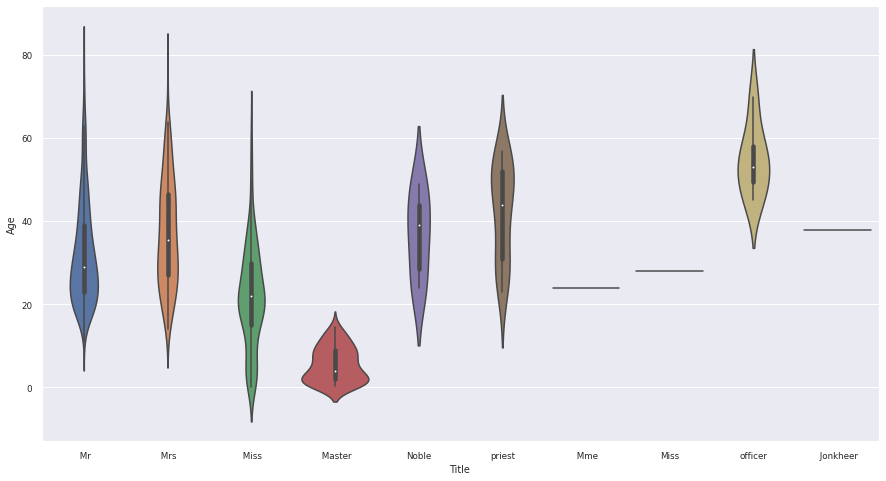

In [154]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Title',y='Age',hug = 'Survived', data = data, split=True)
plt.show()

In [149]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Train,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Train,Mr


In [155]:
# name을 삭제
data = data.drop('Name', axis = 1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [158]:
# 같은 타이틀을 갖는 승객끼리 그룹을 나누고, 그룹별 승객 나이를 중간값으로 결측값을 대체한다.
for title in  data['Title'].unique():
  # 결측값 개수 확인
  print(f"{title} 결측값 개수: {data.loc[data['Title'] == title,'Age'].isnull().sum()}")
  # 각 Title의 중간값으로 대체
  age_med = data.loc[data['Title'] == title,'Age'].median()
  data.loc[data['Title']==title,'Age'] = data.loc[data['Title']==title,'Age'].fillna(age_med)

 Mr 결측값 개수: 176
 Mrs 결측값 개수: 27
 Miss 결측값 개수: 50
 Master 결측값 개수: 8
Noble 결측값 개수: 0
priest 결측값 개수: 1
 Mme 결측값 개수: 0
Miss 결측값 개수: 1
officer 결측값 개수: 0
 Jonkheer 결측값 개수: 0


In [162]:
data['Age'].isnull().sum()

0

In [163]:
# 나이에 따라  생존율에 차이가 나기 때문에 앞의 히스토그램 분포를 기준으로 Age열의 데이터를 여러개의 구간으로 나눈다
# 비닝(Bining)기법 이라고 부름

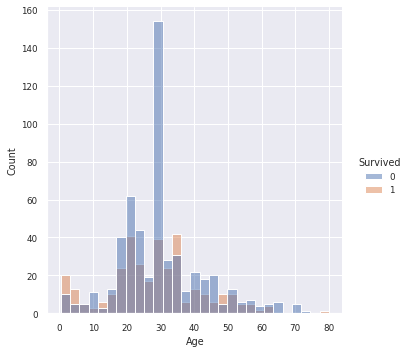

In [164]:
sns.displot(x='Age',kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

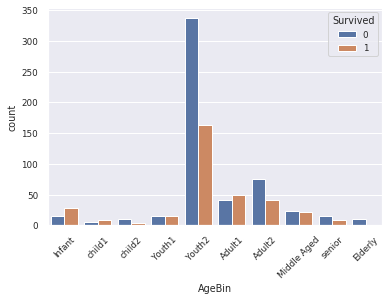

In [165]:
# 판다스의 cut 함수를 사용하고 각 구간을 나누느 경계값(bins), 각 구간의 이름(labels)을 지정
# 0~4세는 infant, 4~8세는 child  8~12 Child2
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels=['Infant','child1','child2','Youth1','Youth2','Adult1','Adult2','Middle Aged','senior','Elderly']
data['AgeBin'] = pd.cut(data['Age'],bins=bins, labels=labels)
# age_bin(나이구간)에 따른 생존율 비교
sns.countplot(x='AgeBin', hue = 'Survived',data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()